<a href="https://colab.research.google.com/github/jjcrofts77/TMB-MATH34041/blob/main/content/notebooks/Chapter1/Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 What are Networks?

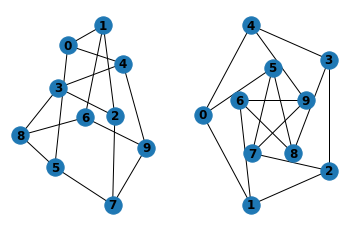

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# add a network manually
G = nx.Graph()

G.add_node(1)

G.add_nodes_from([2, 3])

G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

# load a special network and plot it
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
